In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
res = {}
for p in [10, 15, 20]:
    res[p] = {}
    for r in [3, 4]:
        with open(f"./results/Hamiltonian_ibm_kyiv_0/16_0/{p=}/results_{r=}.csv", 'r') as f:
            rd = csv.DictReader(f, delimiter=';', quotechar="'")
            res[p][r] = list(rd)


In [4]:
ref = {}
for p in [10, 15, 20]:
    ref[p] = np.load(f"./problems/transfer_Hamiltonian_ibm_kyiv_0_angles_16_0_p_{p}.pkl", allow_pickle=True)

In [5]:
def plot_energy_lin(p):

    lowesa_x = list(x ** 0.5 for x in ref[p]['en'].keys())
    lowesa_y = list(sum(x.values()) for x in ref[p]['en'].values())

    
    clrs = {"BP": 'blue', "NN+BP": 'red'}
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    miny = 0
    maxy = -1000
    for i, r in enumerate([3, 4]):
        for pt in res[p][r]:
            mrk = 'x' if pt["chi"] == '1' else '+'
            clr = clrs[pt["which"]]
            ax[i].scatter([1 / float(pt["D"])], float(pt["eng"]),
                        marker=mrk, color=clr, s=50)
            miny = min(miny, float(pt["eng"]))
            maxy = max(maxy, float(pt["eng"]))

        ax[i].plot(lowesa_x, lowesa_y, '-x', label='lowesa')
        miny = min(min(lowesa_y), miny)
        #maxy = max(max(lowesa_y), maxy)

        ax[i].set_xscale('log')
        ax[i].set_xlabel('1 / D')
        ax[i].set_ylabel(f'eng')
        ax[i].set_ylim(miny-1, maxy+4)
        ax[i].set_xlim(1e-3, 1)

        ax[i].grid(which='major')
        ax[i].grid(which='minor')
        ax[i].set_title(f'{p=}, tensor rank {r}')

        ax[i].scatter([1.2], [1e-2], marker='+', color='black', s=50, label='chi=2')
        ax[i].scatter([1.2], [1e-2], marker='x', color='black', s=50, label='BP (chi=1)')
        for k, v in clrs.items():
            ax[i].scatter([1.2], [1e-2], marker='o', color=v, s=50, label=k)

        ax[i].legend()
    # plt.legend()
# plt.show()

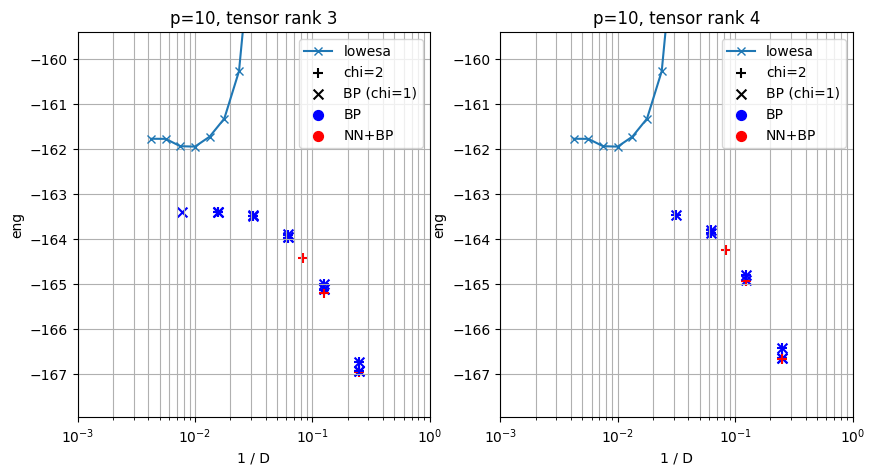

In [6]:
plot_energy_lin(10)

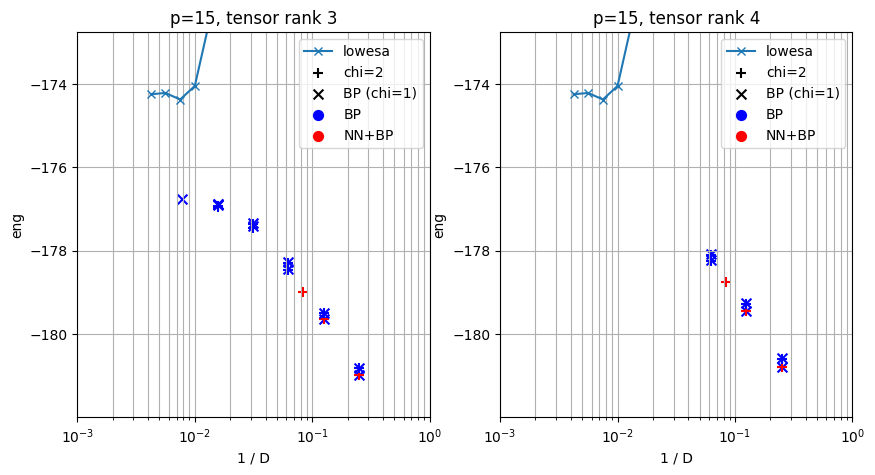

In [7]:
plot_energy_lin(15)

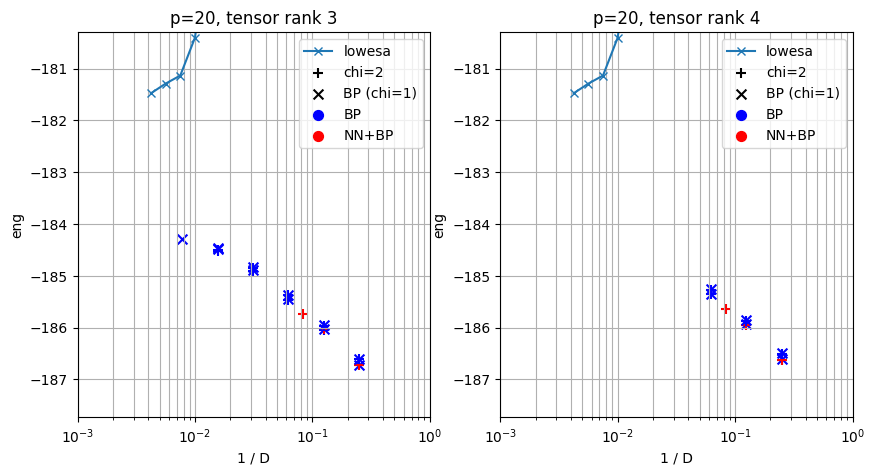

In [8]:
plot_energy_lin(20)

In [19]:
min(float(x['eng']) for x in res[p][r])

-186.6240812326265

In [24]:
def plot_energy(p):

    eng0 = {5: -145.5, 10: -159}
    ind_ref = min(ref[p]['en'].keys())
    eng0[p] = sum(ref[p]['en'][ind_ref].values())

    eng00 = max(float(x['eng']) for i, r in enumerate([3, 4]) for x in res[p][r] )
    print(eng00)

    clrs = {"BP": 'blue', "NN+BP": 'red'}
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    for i, r in enumerate([3, 4]):
        for pt in res[p][r]:
            mrk = 'x' if pt["chi"] == '1' else '+'
            clr = clrs[pt["which"]]
            ax[i].scatter([1 / float(pt["D"])], eng00 - float(pt["eng"]),
                        marker=mrk, color=clr, s=50)

        ax[i].set_yscale('log')
        ax[i].set_xlabel('1 / D')
        ax[i].set_ylabel(f'{eng0[p]} - eng')
        ax[i].set_ylim(1e-2, 10)
        ax[i].set_xlim(0, 0.26)

        ax[i].grid(which='major')
        ax[i].grid(which='minor')
        ax[i].set_title(f'{p=}, tensor rank {r}')

        ax[i].scatter([1.2], [1e-2], marker='+', color='black', s=50, label='chi=2')
        ax[i].scatter([1.2], [1e-2], marker='x', color='black', s=50, label='BP (chi=1)')
        for k, v in clrs.items():
            ax[i].scatter([1.2], [1e-2], marker='o', color=v, s=50, label=k)

        ax[i].legend()
    # plt.legend()
# plt.show()

-163.4001045289278


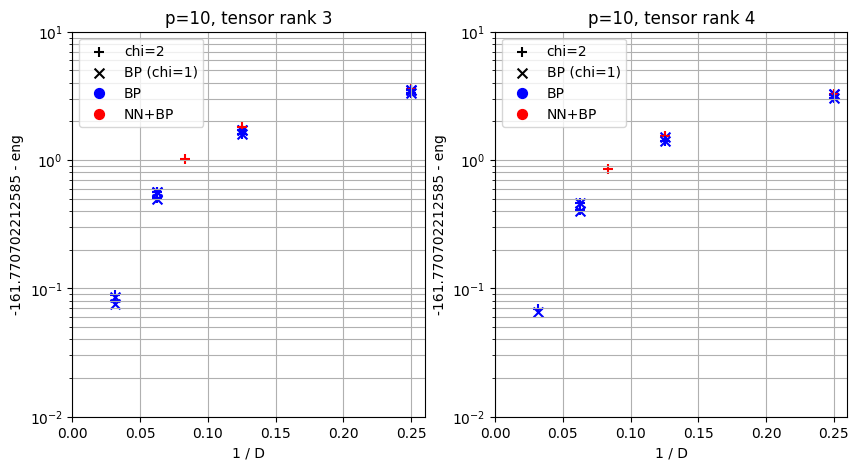

In [25]:
plot_energy(p=10)

-176.7566943008547


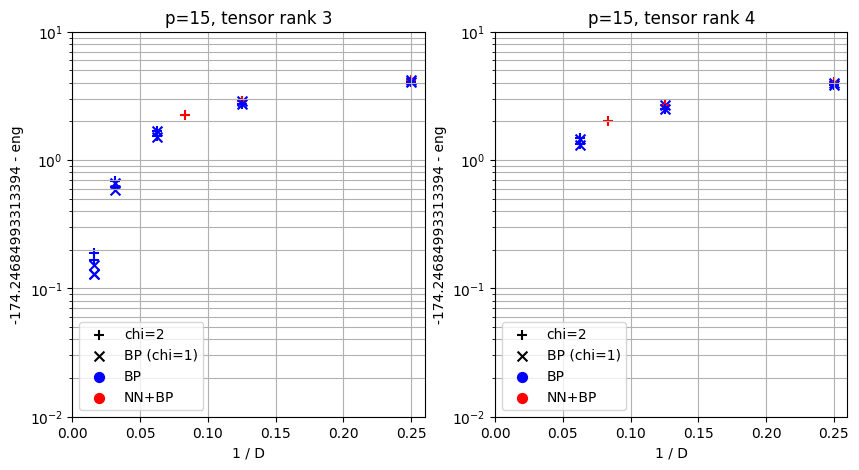

In [26]:
plot_energy(p=15)

-184.2953509550293


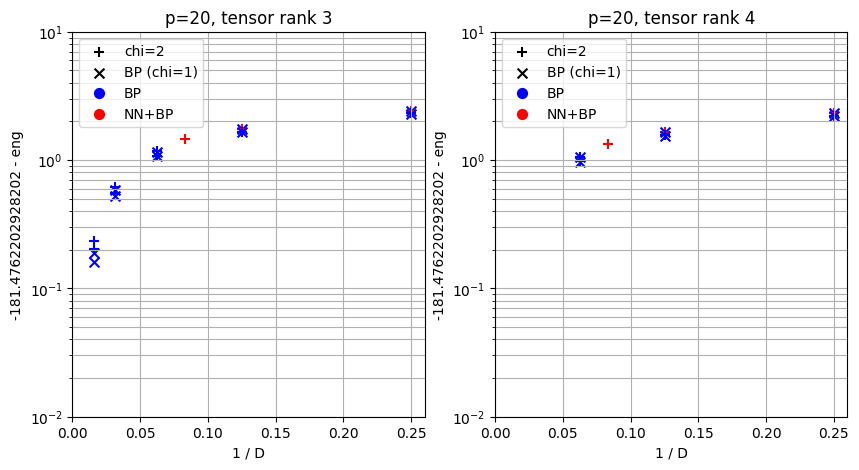

In [27]:
plot_energy(p=20)

In [28]:
def plot_contraction_comparison(p):
    clrs = {"BP": 'blue',  "NN+BP": 'red'}
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

    for i, r in enumerate([3, 4]):
        res_eng = {(pt["which"], pt["D"], pt["chi"]): float(pt["eng"]) for pt in res[p][r]}

        for (which, D, chi), eng in res_eng.items():
            if chi != '1' and (which, D, '1') in res_eng:
                dE = eng - res_eng[(which, D, '1')]
                clr = clrs[which]
                ax[i].scatter([1 / float(D)], abs(dE),
                            marker='+', color=clr, s=100)

        ax[i].set_yscale('log')
        ax[i].set_xlabel('1 / D')
        ax[i].set_ylabel(f'|eng(MPS chi=4D) - eng(BP chi=1)|')
        ax[i].set_ylim(1e-4, 1e-1)
        ax[i].set_xlim(0, 0.26)

        ax[i].grid(which='major')
        ax[i].grid(which='minor')
        ax[i].set_title(f'{p=}, tensor rank {r}')

        # ax[i].scatter([1.2], [1e-2], marker='+', color='black', s=50, label='MPS chi=4*D')
        # ax[i].scatter([1.2], [1e-2], marker='x', color='black', s=50, label='BP (chi=1)')
        for k, v in clrs.items():
            ax[i].scatter([1.2], [1e-2], marker='o', color=v, s=50, label=k)

        ax[i].legend()
        # plt.legend()
    # plt.show()

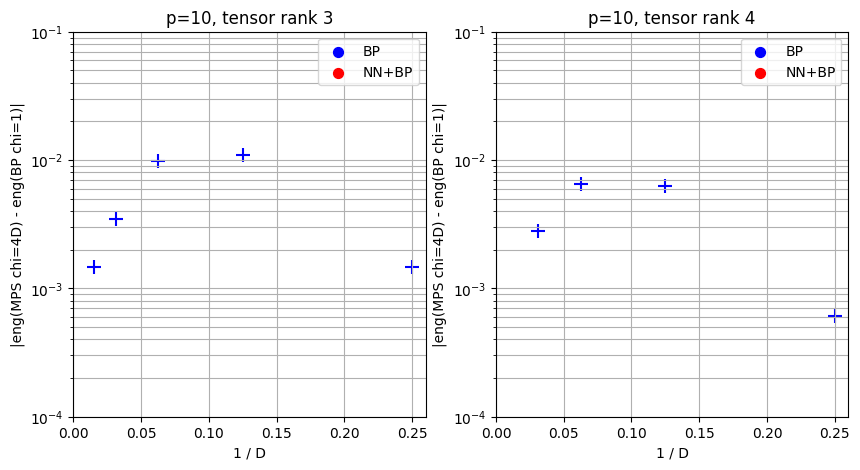

In [29]:
plot_contraction_comparison(p=10)

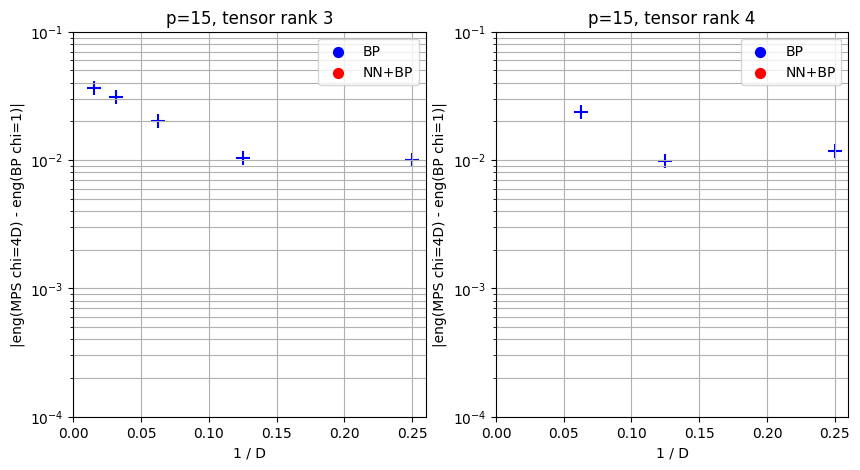

In [30]:
plot_contraction_comparison(p=15)

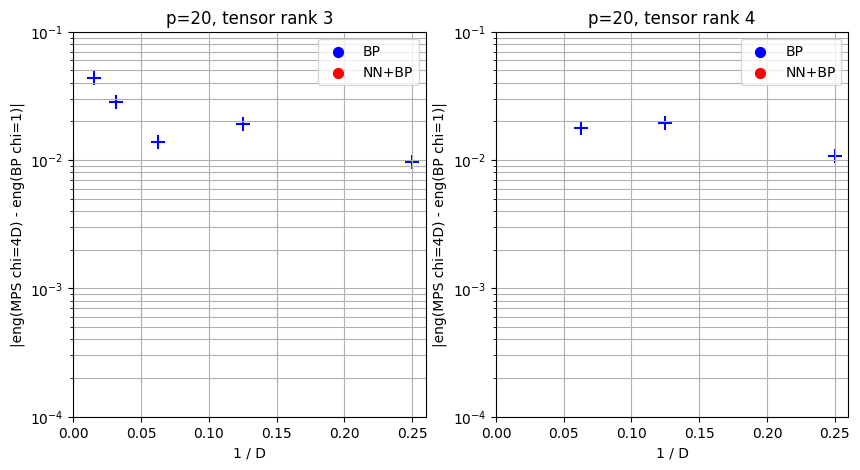

In [31]:
plot_contraction_comparison(p=20)